In [1]:
from maelzel.core import *

Chain([4C:0.5♩, 4D:1♩, 4E:1♩, 4F:2♩])
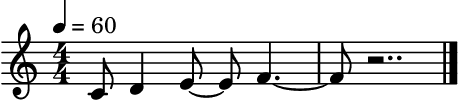

In [2]:
ch = Chain(r'''
    4C:0.5
    4D:1
    4E:1
    4F:2
''')
ch

In [3]:
ch.itemsBetween(0.25, 3)

[4C:0.5♩, 4D:1♩, 4E:1♩, 4F:2♩]

In [4]:
events = ch.eventsBetween(0.25, 3)
for ev in events:
    print(f"{str(ev).ljust(10)}{ev.parent}")

4C:0.5♩   Chain([4C:0.5♩, 4D:1♩, 4E:1♩, 4F:2♩])
4D:1♩     Chain([4C:0.5♩, 4D:1♩, 4E:1♩, 4F:2♩])
4E:1♩     Chain([4C:0.5♩, 4D:1♩, 4E:1♩, 4F:2♩])
4F:2♩     Chain([4C:0.5♩, 4D:1♩, 4E:1♩, 4F:2♩])


Chain([4D:1♩, 4E:1♩, 4F:0.5♩], offset=1/2)
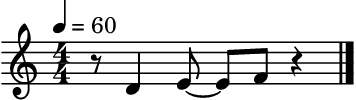

In [5]:
cropped = ch.cropped(0.5, 3)
cropped.dump()
cropped

Chain([4D:1♩, 4E:1♩, 4F:0.5♩], offset=1/4)
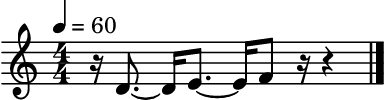

In [6]:
cropped.timeShift(-F(1, 4))

Chain([4D:1♩:offset=0, 4E:1♩:offset=1, 4F:0.5♩:offset=2], offset=1/4)
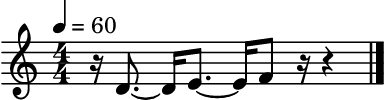

In [7]:
cropped2 = cropped.copy()
cropped2.timeShiftInPlace(-F(1, 4))
cropped2

Chain([4D:1♩, 4E:1♩, 4F:0.5♩], offset=3/4)
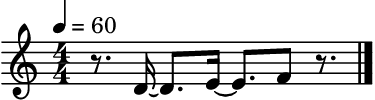

In [8]:
cropped.timeShift(F(1, 4))

Chain([4D:1♩, 4E:1♩, 4F:0.5♩], offset=3/4)
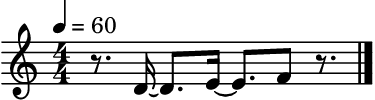

In [9]:
cropped2 = cropped.copy()
cropped2.timeShiftInPlace(F(1, 4))
cropped2

Chain([4D:1♩, 4E:1♩, 4F:0.5♩], offset=1/2)
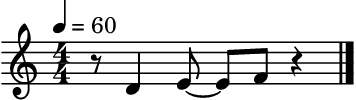

In [10]:
cropped2 = cropped.copy()
cropped2.dump()
cropped2.absorbInitialOffset()
cropped2.dump()
cropped2

Chain([4C:0.5♩, 4D:1♩, Chain([4E:1♩:offset=1, 4F:2♩], offset=3)])
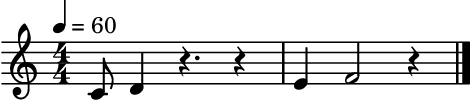

In [12]:
ch2 = Chain([
    "4C:0.5",
    "4D:1",
    Chain([
        "4E:1:offset=1",
        "4F:2"
    ], offset=3)
])
ch2

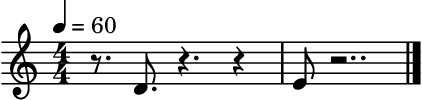

In [13]:
ch3 = ch2.cropped(0.75, (1, 0.5))
ch3.dump()
ch3.show()

Voice([4D:0.75♩:offset=0.75, Chain([4E:0.5♩], offset=4)])
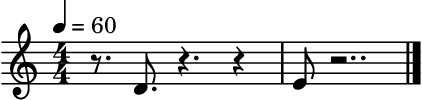

In [14]:
ch3.asVoice()

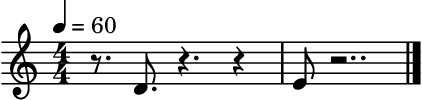

3/4


Chain([4D:0.75♩, Chain([4E:0.5♩], offset=13/4)])
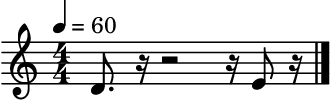

In [15]:
ch3.show()
ch3.dump()
print(ch3[0].absOffset())
ch4 = ch3.timeShift(-ch3[0].absOffset())
ch4.removeRedundantOffsets()
ch4.dump()
ch4

Chain([4C:0.5♩, 4D:1♩, 4E:1♩, Chain([4F:1♩, 4G:1♩])])
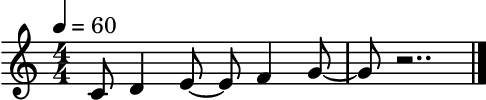

In [16]:
from maelzel.core import *
v = Chain([
    "4C:0.5",
    "4D:1",
    "4E:1",
    Chain("""
    4F:1
    4G:1
    """)# .addSpanner('slur')
])
v

Chain([4F:0.5♩], offset=5/2)
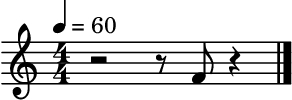

In [17]:
v[-1].cropped(F(5, 2), F(3))

Chain([4D:0.5♩, 4E:1♩, Chain([4F:0.5♩])], offset=1)
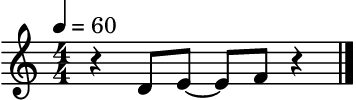

In [18]:
v.cropped(1, 3)

Chain([4F:1♩, 4G:1♩], offset=5/2)
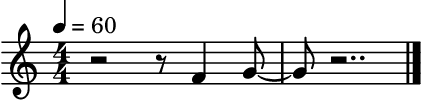

In [19]:
v = Chain([
    "4F:1",
    "4G:1"
], offset=F(5, 2))
v

Chain([4F:0.5♩], offset=5/2)
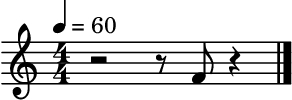

In [20]:
v.cropped(F(5, 2), F(3))

Chain([4F:0.5♩:offset=2.25], offset=1/4)
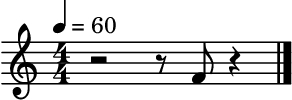

In [21]:
v.cropped(0.25, 3.)

Voice([4C:0.5♩, 4D:1♩, 4E:1♩, Chain([4F:1♩:symbols=[Slur(anchor=Slur, kind=start, linetype=solid, partnerSpanner=Slur, uuid=9xqkhnng)], 4G:1♩:symbols=[Slur(anchor=Slur, kind=end, linetype=solid, partnerSpanner=Slur, uuid=9xqkhnng)]])])
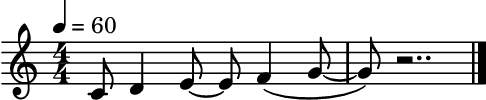

In [22]:
from maelzel.core import *
v = Voice([
    "4C:0.5",
    "4D:1",
    "4E:1",
    Chain("""
    4F:1
    4G:1
    """).addSpanner('slur')
        
    
])
v

Chain([4C:0.25♩, 4D:1♩, 4E:1♩, Chain([4F:0.5♩:symbols=[Slur(anchor=Slur, kind=start, linetype=solid, partnerSpanner=Slur, uuid=9xqkhnng)]])], offset=1/4)
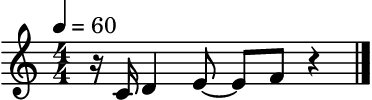

In [23]:
v2 = v.cropped(0.25, 3.)
v2

In [24]:
ch = Chain([
    Note("4D~", 1, amp=0.1),
    Note("4D", 2, amp=1).setPlay(fade=(0, 1))
])
print(ch.events())
ch.play()
    

[SynthEvent(delay=0, dur=3, instr=sin, gain=1, chan=1, fade=(0.02, 1), position=0.5, bps=‹0.0s 62 0.1; 1.0s 62 1; 3.0s 62 1›)]





--Csound version 6.19 (double samples) Jan 13 2024
[commit: c53556fbbb69d14554a4a4bd91efa441a1701d70]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:sin=501.0002 start=0.982 dur=3.000 p4=0.5 kpos=1 kgain=17 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=1 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 p17=62 p18=0.1 p19=1 p20=62 …)

In [25]:
ch = Chain([
    "4C:1:offset=0.5",
    "4E:1",
    "4G:1"
])
ch.dump()
ch.absorbInitialOffset()
ch.dump()